## Vantagens da Utilização

- Rápido para estimar/treinar e classificar novas observações

- Boa precisão para muitos conjuntos de dados simples

- Resistente ao Overfitting

- Pode-se interpretar os coeficientes do modelo como indicadores de importância

## Regressão Logistica, não é problema para regressão e sim para classificação


Recursos para calcular metricas

Matriz de Confusão

In [ ]:
#importando dados

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

#ajustando dados

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

#separando variaveis preditoras e variavel resposta
X = dados[['bmi', 'charges']]
y = dados['smoker']



In [ ]:
# Técnica de Validação K-Fold

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)



## Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
reglog




{'fit_time': array([0.02419782, 0.01247263, 0.01154709, 0.01141405, 0.01162553,
        0.01258039, 0.01193023, 0.01289725, 0.01238489, 0.01168561]),
 'score_time': array([0.00237346, 0.00211668, 0.00209999, 0.00203681, 0.00234246,
        0.00209856, 0.00259209, 0.00207376, 0.00240588, 0.0021596 ]),
 'test_score': array([0.94029851, 0.91791045, 0.92537313, 0.92537313, 0.93283582,
        0.89552239, 0.97014925, 0.93283582, 0.93984962, 0.93984962])}

In [ ]:
reglog['test_score']

array([0.94029851, 0.91791045, 0.92537313, 0.92537313, 0.93283582,
       0.89552239, 0.97014925, 0.93283582, 0.93984962, 0.93984962])

In [ ]:
reglog['test_score'].mean()

0.9319997755582987

In [ ]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print(' Acuracia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade: ', round(reglog['test_recall'].mean(), 4))
print(' Precisão:', round(reglog['test_precision'].mean(), 4))

 Acuracia: 0.932
Sensibilidade:  0.8049
 Precisão: 0.8595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


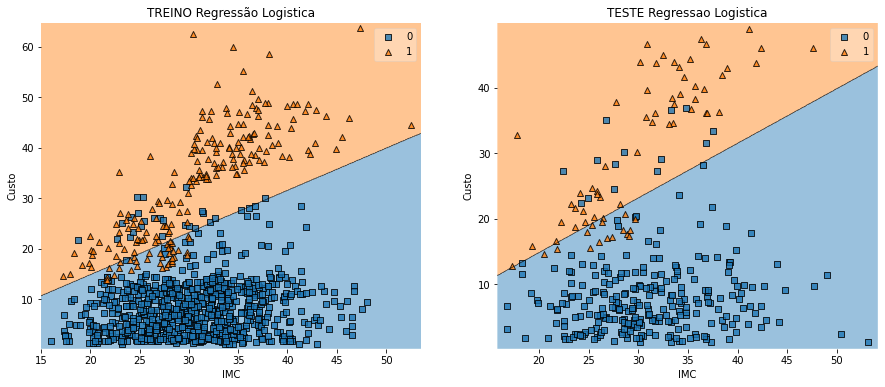

In [ ]:
# Gráfico de Decisão 

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize =(15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend =1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TREINO Regressão Logistica')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend =1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TESTE Regressao Logistica')

plt.show()


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 7

modelo = KNeighborsClassifier(n_neighbors= k)
knn = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('  Acurácia:',round(knn['test_accuracy'].mean(), 2))
print('Sensibilidade: ',round(knn['test_recall'].mean(), 2))
print('  Precisão:',round(knn['test_precision'].mean(), 2))



  Acurácia: 0.95
Sensibilidade:  0.93
  Precisão: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


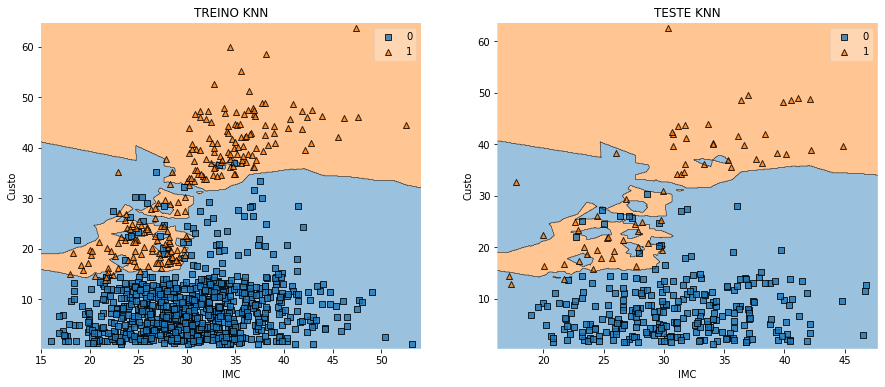

In [ ]:
# Gráfico de Decisão 

Xtreino, Xteste, ytreino, yteste, = train_test_split(X, y, test_size=0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend =1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TREINO KNN')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TESTE KNN')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 3
amostra_minima = 20

modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('  Acurácia: ', round(arvore['test_accuracy'].mean(), 4))
print('  Sensibilidade: ',round(arvore['test_recall'].mean(), 4))
print('  Precisão:', round(arvore['test_precision'].mean(), 4))



  Acurácia:  0.9604
  Sensibilidade:  0.9485
  Precisão: 0.8739


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


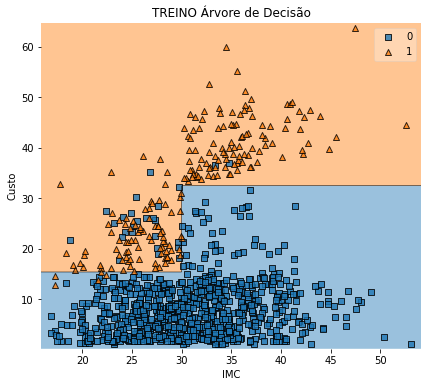

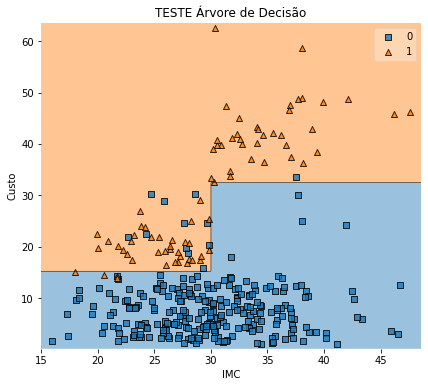

In [ ]:
# Gráfico de Decisão

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend= 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TREINO Árvore de Decisão')

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 1)
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.title('TESTE Árvore de Decisão')

plt.show()

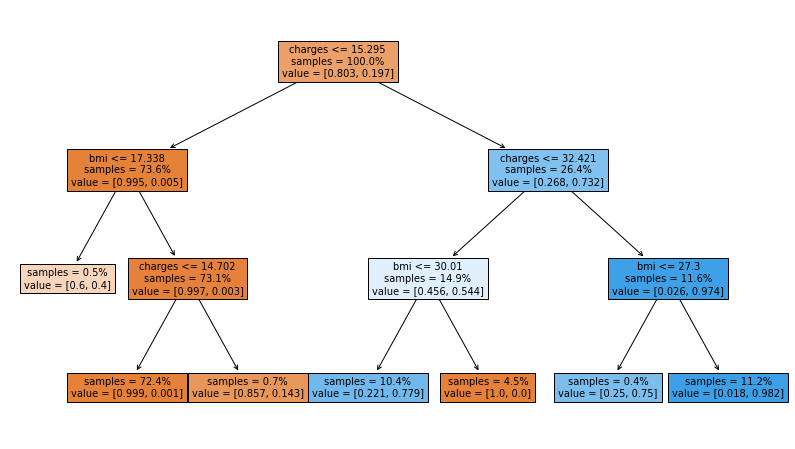

In [ ]:
# Plot da Arvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled = True, proportion = True, impurity= False, feature_names = X.columns)
plt.show()

## Comparação de Modelos via Validação Cruzada K -Fold

In [ ]:
modelos = [LogisticRegression(),
           KNeighborsClassifier(n_neighbors= 5),
           KNeighborsClassifier(n_neighbors= 15),
           KNeighborsClassifier(n_neighbors= 25),
           KNeighborsClassifier(n_neighbors= 35),
           KNeighborsClassifier(n_neighbors= 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logistica',
         'KNN - K = 5',
         'KNN - K = 15',
         'KNN - K = 25',
         'KNN - K = 35',
         'KNN - K = 45',
         'Arvore - Prof = 1',
         'Arvore - Prof = 2',
         'Arvore - Prof = 3',
         'Arvore - Prof = 4',
         'Arvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acuracia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acuracia', ascending = False).round(4)

,Acuracia,Sensibilidade,Precisão
KNN - K = 25,0.9634,0.9719,0.8660
Arvore - Prof = 3,0.9611,0.9722,0.8592
Arvore - Prof = 4,0.9604,0.9544,0.8624
KNN - K = 35,0.9589,0.9643,0.8533
KNN - K = 5,0.9582,0.9324,0.8743
KNN - K = 45,0.9581,0.9614,0.8472
KNN - K = 15,0.9574,0.9566,0.8525
Arvore - Prof = 5,0.9552,0.9253,0.8733
Regressão Logistica,0.9320,0.7982,0.8581
Arvore - Prof = 1,0.9275,0.9615,0.7561
